In [18]:
# Import modules
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

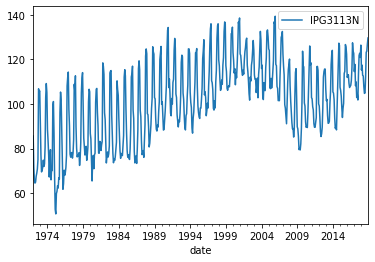

In [1]:


# Load in the time series
candy = pd.read_csv('datasets/candy_production.csv', 
                 index_col='date', 
                 parse_dates=True)

# Plot and show the time series on axis ax
fig, ax = plt.subplots()
candy.plot(ax=ax)
plt.show()

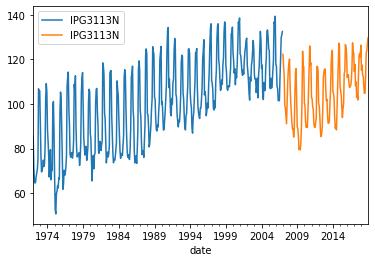

In [2]:
# Split the data into a train and test set
candy_train = candy.loc[:'2006']
candy_test = candy.loc['2007':]

# Create an axis
fig, ax = plt.subplots()

# Plot the train and test sets on the axis ax
candy_train.plot(ax=ax)
candy_test.plot(ax=ax)
plt.show()

# making time series stationary

In [7]:
earthquake = pd.read_csv('datasets/earthquakes.csv', index_col = 'date')

In [10]:
# Import augmented dicky-fuller test function
from statsmodels.tsa.stattools import adfuller

# Run test
result = adfuller(earthquake['earthquakes_per_year'])

# Print test statistic
print(result)


(-3.1831922511917825, 0.020978425256003668, 2, 96, {'1%': -3.5003788874873405, '5%': -2.8921519665075235, '10%': -2.5830997960069446}, 549.0681467660734)


## modifying time series so that it becomes a stationary series

In [15]:
amazon = pd.read_csv('datasets/amazon_close.csv', parse_dates=True, index_col='date')

In [16]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

(-7.203579488811357, 2.33127172548566e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)


note that amazon_diff has very small p-value(which is necessary for modelling)

In [19]:
# Calculate the first difference and drop the nans
amazon_diff = amazon.diff()
amazon_diff = amazon_diff.dropna()

# Run test and print
result_diff = adfuller(amazon_diff['close'])
print(result_diff)

# Calculate log-return and drop nans
amazon_log = np.log(amazon/amazon.shift(1))
amazon_log = amazon_log.dropna()

# Run test and print
result_log = adfuller(amazon_log['close'])
print(result_log)

(-7.203579488811357, 2.33127172548566e-10, 23, 1234, {'1%': -3.435660336370594, '5%': -2.863885022214541, '10%': -2.568018522153254}, 10764.626718933836)
(-34.91574853605969, 0.0, 0, 1257, {'1%': -3.4355629707955395, '5%': -2.863842063387667, '10%': -2.567995644141416}, -6245.723147672197)


log transformation has given very small p-value, better that diff()

## Generating arma series

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'sigma'' keyword is deprecated, use 'scale' instead
  # Remove the CWD from sys.path while we load stuff.


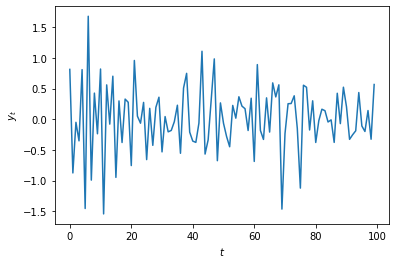

In [20]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(1)

# Set coefficients
ar_coefs = [1]
ma_coefs = [1, -0.7]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'sigma'' keyword is deprecated, use 'scale' instead
  # Remove the CWD from sys.path while we load stuff.


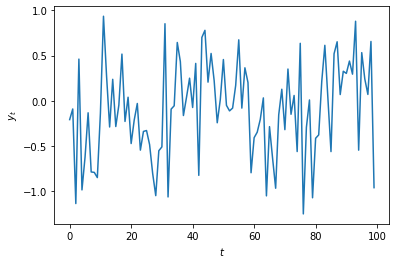

In [21]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(2)

# Set coefficients
ar_coefs = [1, -0.3, -0.2]
ma_coefs = [1]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5)

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()

C:\Users\brama\Miniconda3\envs\ds\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: the 'sigma'' keyword is deprecated, use 'scale' instead
  # Remove the CWD from sys.path while we load stuff.


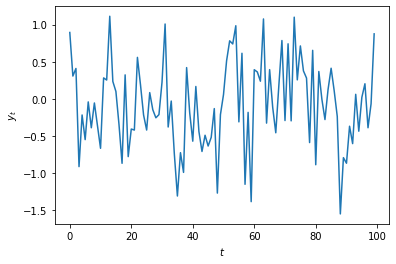

In [22]:
# Import data generation function and set random seed
from statsmodels.tsa.arima_process import arma_generate_sample
np.random.seed(3)

# Set coefficients
ar_coefs = [1, 0.2]
ma_coefs = [1, 0.3, 0.4]

# Generate data
y = arma_generate_sample(ar_coefs, ma_coefs, nsample=100, sigma=0.5, )

plt.plot(y)
plt.ylabel(r'$y_t$')
plt.xlabel(r'$t$')
plt.show()